# The Adavanced Application of the Filter

### 本章節內容大綱
* [影像金字塔 Image pyramid](#影像金字塔-Image-pyramid)
* [形態學](#形態學-morphology)
* [影像顏色分佈](#影像顏色分佈)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from numpy import shape

* ## 影像金字塔 Image pyramid
主要功能是可以從不同的解析度來發現到圖像的特性，有時候在低解析度在圖像分辨上，反而不會被太多影像細節所干涉，而在卷積類神經網路中，有些演算法也有加入此概念。

In [2]:
# upload Data
!wget -q https://github.com/TA-aiacademy/course_3.0/releases/download/CVCNN_Data/CVCNN_part1.zip
!unzip -q CVCNN_part1.zip

In [3]:
Original_image = cv2.imread('poker.jpg', cv2.IMREAD_UNCHANGED)
Original_image = cv2.cvtColor(Original_image, cv2.COLOR_BGR2RGB)

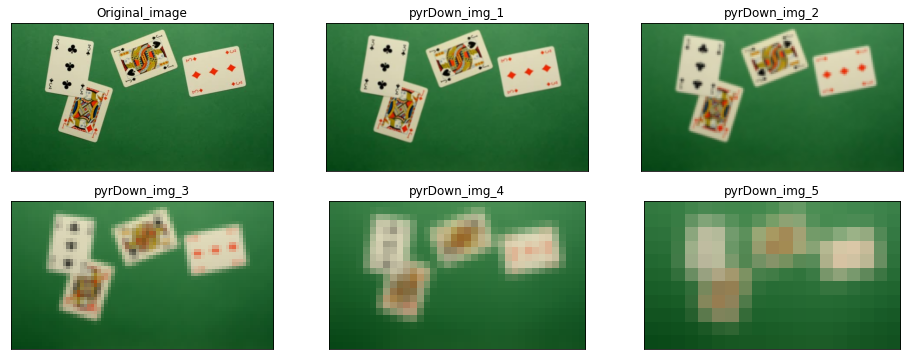

In [4]:
pyrDown_img_1 = cv2.pyrDown(Original_image)
pyrDown_img_2 = cv2.pyrDown(pyrDown_img_1)
pyrDown_img_3 = cv2.pyrDown(pyrDown_img_2)
pyrDown_img_4 = cv2.pyrDown(pyrDown_img_3)
pyrDown_img_5 = cv2.pyrDown(pyrDown_img_4)


titles = ['Original_image', 'pyrDown_img_1',
      'pyrDown_img_2', 'pyrDown_img_3',
      'pyrDown_img_4', 'pyrDown_img_5']
images = [Original_image, pyrDown_img_1, pyrDown_img_2,
      pyrDown_img_3, pyrDown_img_4, pyrDown_img_5]

plt.figure(figsize=(16, 6))

for i in range(6):
  plt.subplot(2, 3, i+1), plt.imshow(images[i])
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])
plt.show()

[(back...)](#The-Adavanced-Application-of-the-Filter)

* ## 形態學 morphology
除了先前幾份程式碼中一些線性的濾波器外，也有一些非線性的影像處理方式。<br>
形態學是其中一個實用的工具，能夠達成消除雜點、抓出形狀等等的用途。

先加入椒鹽雜訊

In [6]:
image = cv2.imread('5z.png', cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

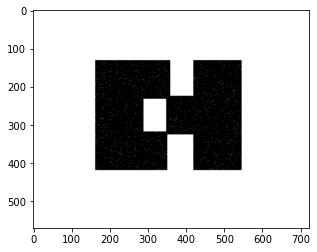

In [7]:
def ImpulseNoise(img, noise_type, percetage):
  NoiseNum = int(percetage * img.shape[0] * img.shape[1])

  randX = np.random.randint(0, img.shape[0], NoiseNum)
  randY = np.random.randint(0, img.shape[1], NoiseNum)

  if noise_type == "pepper":
    img[randX, randY] = 0
  elif noise_type == "salt":
    img[randX, randY] = 255
  elif noise_type == "s&p":
    img[randX[::2], randY[::2]] = 0
    img[randX[1::2], randY[1::2]] = 255
  else:
    pass

  return img


NoiseImage = ImpulseNoise(image, "salt", 0.01)
plt.imshow(NoiseImage)

對有雜點的圖片使用形態學工具<br>
以下演示：<br>
<img src="https://i.imgur.com/8GpROJl.png" width=550/>

這五種的用法以及效果。

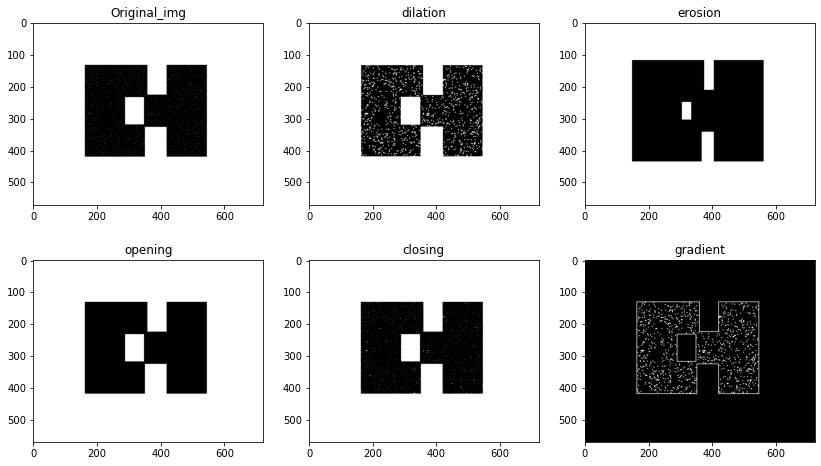

In [8]:
kernel = np.ones((3, 3), np.uint8)
image = NoiseImage

# 膨脹(與kernel作用後取最大值)
dilation = cv2.dilate(image, kernel, iterations=1)

# 侵蝕(與kernel作用後取最小值)
erosion = cv2.erode(image, kernel, iterations=15)

# 開運算(先侵蝕再膨脹)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# 閉運算(先膨脹再侵蝕)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# 梯度(膨脹減去侵蝕)
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

titles = ['Original_img', 'dilation', 'erosion',
      'opening', 'closing', 'gradient']
images = [image, dilation, erosion,
      opening, closing, gradient]

plt.figure(figsize=(14, 8))
for i in range(6):
  plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
  plt.title(titles[i])
plt.show()

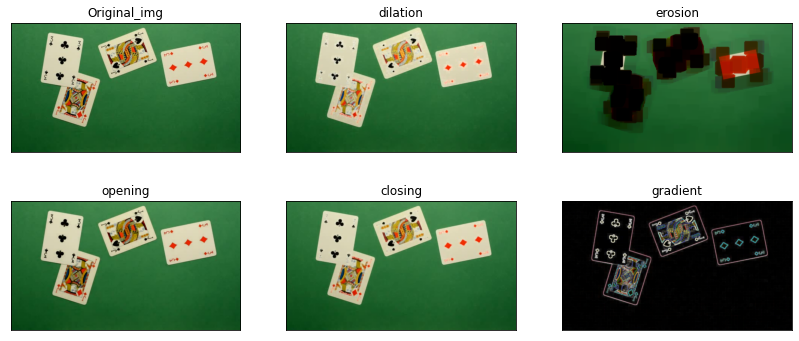

In [9]:
kernel = np.ones((3, 3), np.uint8)
image = cv2.imread('poker.jpg', cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 膨脹(與kernel作用後取最大值)
dilation = cv2.dilate(image, kernel, iterations=1)

# 侵蝕(與kernel作用後取最小值)
erosion = cv2.erode(image, kernel, iterations=15)

# 開運算(先侵蝕再膨脹)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# 閉運算(先膨脹再侵蝕)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# 梯度(膨脹減去侵蝕)
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)


titles = ['Original_img', 'dilation', 'erosion',
      'opening', 'closing', 'gradient']
images = [image, dilation, erosion, opening, closing, gradient]


plt.figure(figsize=(14, 6))
for i in range(6):
  plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.show()

若真的對形態學<font color=#ff0000 size=5>很</font>有興趣的話，可以去以下連結觀看：<br>
* wiki<br>
https://en.wikipedia.org/wiki/Mathematical_morphology
* opencv<br>
erosion and dilation:<br> 
https://docs.opencv.org/4.1.1/db/df6/tutorial_erosion_dilatation.html<br>
morphologyEx:<br>
https://docs.opencv.org/4.1.1/d3/dbe/tutorial_opening_closing_hats.html<br>
* 雜七雜八介紹:<br>
https://www.youtube.com/watch?v=IcBzsP-fvPo<br>
https://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm<br>
https://en.wikipedia.org/wiki/Mathematical_morphology<br>

[(back...)](#The-Adavanced-Application-of-the-Filter)

* ## 影像顏色分佈
觀察圖像中pixel的成分分佈

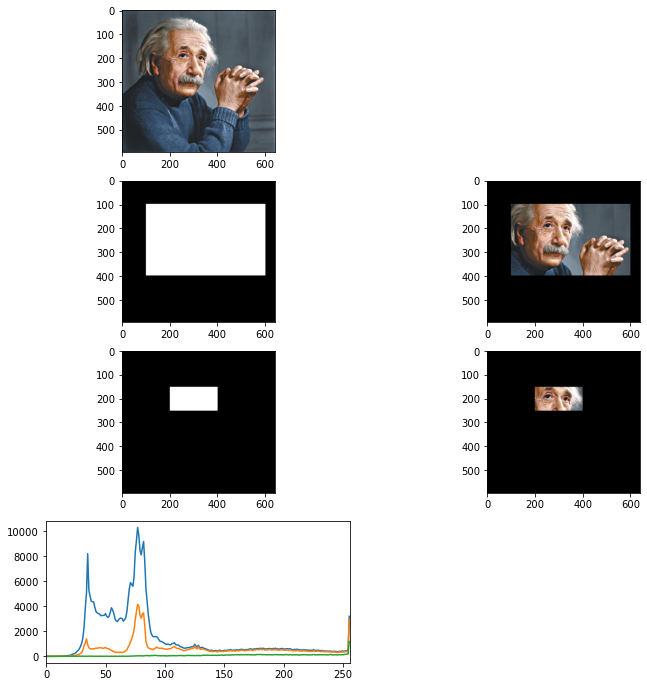

In [10]:
img = cv2.imread('Einstein.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# create a mask
mask_1 = np.zeros(img.shape[:2], np.uint8)
mask_2 = np.zeros(img.shape[:2], np.uint8)

mask_1[100:400, 100:600] = 255
mask_2[150:250, 200:400] = 255
masked_img_1 = cv2.bitwise_and(img, img, mask=mask_1)

masked_img_2 = cv2.bitwise_and(img, img, mask=mask_2)

# Calculate histogram with mask and without mask
# Check third argument for mask
# cv2.calcHist(影像, 通道, 遮罩, 區間數量, 數值範圍)
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask_1 = cv2.calcHist([img], [0], mask_1, [256], [0, 256])
hist_mask_2 = cv2.calcHist([img], [0], mask_2, [256], [0, 256])


plt.figure(figsize=(12, 12))

plt.subplot(421), plt.imshow(img, 'gray')
plt.subplot(423), plt.imshow(mask_1, 'gray')
plt.subplot(424), plt.imshow(masked_img_1, 'gray')
plt.subplot(425), plt.imshow(mask_2, 'gray')
plt.subplot(426), plt.imshow(masked_img_2, 'gray')

plt.subplot(427)
plt.plot(hist_full)
plt.plot(hist_mask_1)
plt.plot(hist_mask_2)
plt.xlim([0, 256])

plt.show()

[(back...)](#The-Adavanced-Application-of-the-Filter)